In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/heights.csv')
data

,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070
...,...,...
1073,170.171897,179.710893
1074,181.182797,173.400060
1075,182.329176,176.036961
1076,179.675460,176.027055


In [2]:
data.shape

(1078, 2)

In [3]:
data.isnull().sum()

father    0
son       0
dtype: int64

Text(0, 0.5, 'Son')

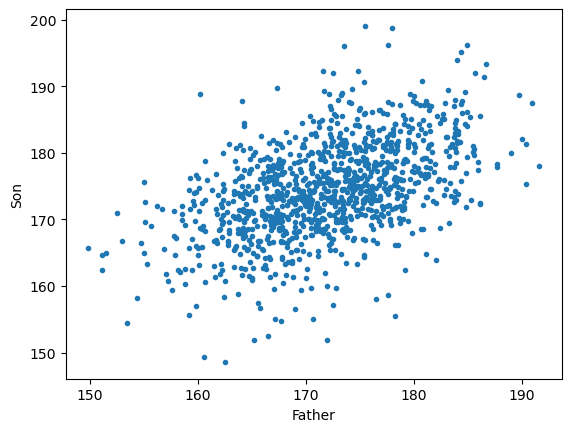

In [4]:
import matplotlib.pyplot as plt

X= data["father"]
y = data["son"]

plt.plot(X,y,'.')
plt.xlabel('Father')
plt.ylabel('Son')

훈련데이터와 테스트데이터 분할

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [6]:
X_train.values

array([179.7426428, 183.7417966, 178.0826004, 182.3291756, 174.3446094,
       173.4406488, 166.3236704, 164.62629  , 169.9563022, 178.418109 ,
       167.2014182, 157.8077108, 178.9448288, 174.9714814, 164.0612924,
       165.940359 , 178.3983986, 175.378364 , 178.44516  , 170.5853332,
       182.0390822, 175.5302052, 185.6017878, 158.537021 , 172.7851256,
       174.0608406, 183.363743 , 164.8211842, 172.7918566, 177.5522992,
       165.3217674, 173.4291172, 175.7518456, 178.753008 , 175.0170236,
       175.9204   , 165.8349236, 175.4575866, 173.5024216, 149.88032  ,
       160.1153262, 176.8058948, 171.7215514, 172.1284848, 173.5399374,
       167.7199592, 177.197512 , 164.661088 , 185.1655682, 173.3088228,
       173.1887062, 163.447603 , 172.957236 , 185.5307186, 162.3644962,
       159.870775 , 172.2060056, 179.6754598, 167.29456  , 176.7021866,
       178.4364224, 162.395535 , 177.9632966, 160.5092802, 184.795795 ,
       176.8015768, 170.9806842, 170.9701432, 171.810045 , 172.0

Text(0, 0.5, 'y train')

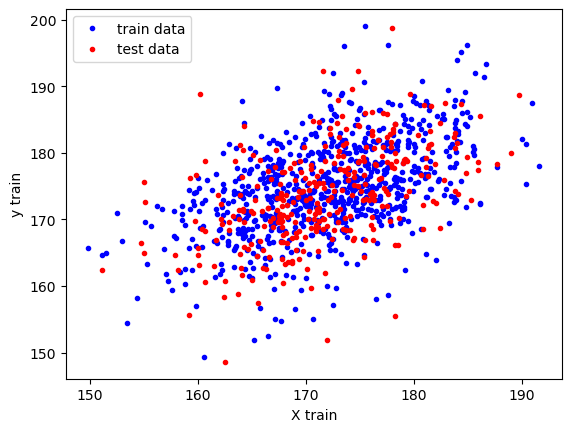

In [7]:
#훈련데이터(파란색)와 테스트데이터(붉은색) 분포 파악하기
plt.plot(X_train, y_train, 'b.', label= "train data")
plt.plot(X_test, y_test, 'r.', label= "test data")
plt.legend()
plt.xlabel('X train')
plt.ylabel('y train')

모델 적합 (메인임)

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train.values.reshape(-1,1),y_train) #reshape(-1,1)로 컬럼 수 1개로 조정

LinearRegression()

In [11]:
#회귀계수 (기울기와 절편)
[lr.coef_, lr.intercept_]

[array([0.50355769]), 88.14029039182925]

회귀모형을 통한 예측

In [14]:
#예측함수 만들기 : y=b(절편) + a(기울기)x
f=lambda x:lr.intercept_ + (lr.coef_ * x)

In [15]:
#f 함수를 이용하여 아빠 키가 180이라면?
f(180)

array([178.7806749])

시각화

In [16]:
#train 데이터의 x값 범위(최소값, 최대값)
x = np.array([min(X_train), max(X_train)])
x

array([149.88032  , 191.6021822])

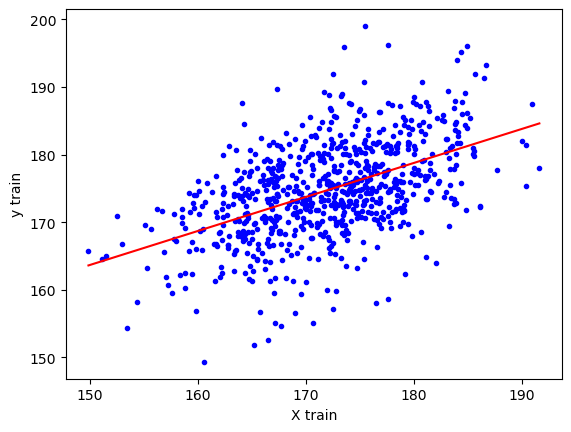

In [17]:
plt.plot(X_train, y_train, 'b.') #train 데이터의 분포
plt.xlabel('X train')
plt.ylabel('y train')
plt.plot(x, f(x), 'r') #회귀식 그래프

성능평가

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
y_pred = lr.predict(X_test.values.reshape(-1,1))
y_pred

array([169.85014541, 178.47356322, 172.69337968, 172.59824494,
       179.09004604, 173.49896805, 177.28700103, 170.80900073,
       175.26274664, 180.70922956, 177.53941889, 173.29071532,
       173.99343078, 172.22196518, 180.6644377 , 174.62035054,
       177.74946227, 178.60240057, 173.9003425 , 168.71163661,
       177.90246062, 174.26704228, 173.82157943, 170.66504517,
       173.44440435, 166.05313359, 176.17345903, 175.34865953,
       172.55717508, 171.96741133, 180.84082963, 173.4415521 ,
       174.23610239, 174.26660741, 176.40346817, 175.69032856,
       180.01458481, 171.60083946, 181.74686074, 174.53379814,
       175.80051756, 176.20034438, 174.34913084, 168.57280999,
       172.62505354, 169.99183707, 172.54088015, 175.69264361,
       180.22814554, 168.92714148, 176.92017335, 172.66258048,
       176.83360816, 175.60363546, 174.30597615, 169.04055365,
       170.45385065, 172.87461915, 172.80530816, 172.6334824 ,
       174.91312201, 170.8792582 , 169.7719579 , 175.69

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [21]:
#결정계수
r2 = r2_score(y_test, y_pred)

In [22]:
print("MAE : %.2f" %mae)
print("MSE : %.2f" %mse)
print("RMSE : %.2f" %rmse)
print("R2 : %.2f" %r2)

MAE : 4.91
MSE : 40.31
RMSE : 6.35
R2 : 0.23


아빠는 23퍼 정도 아들 키에 책임 있다